<a href="https://colab.research.google.com/github/LeonardoRobert/projeto-bd-colab/blob/main/Projeto_BD_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,ID Venda,Cliente,Produto,Quantidade
0,1,Maria,Caneta,10
1,2,João,Caderno,2
2,3,Ana,Borracha,5
3,4,Carlos,Lápis,12
4,5,Beatriz,Caneta,3
5,6,Maria,Régua,2


Relatório: Total de vendas por produto


,Produto,Total Vendas
0,Borracha,5
1,Caderno,2
2,Caneta,13
3,Lápis,12
4,Régua,2


Média de idade das pessoas cadastradas: 30.40 anos


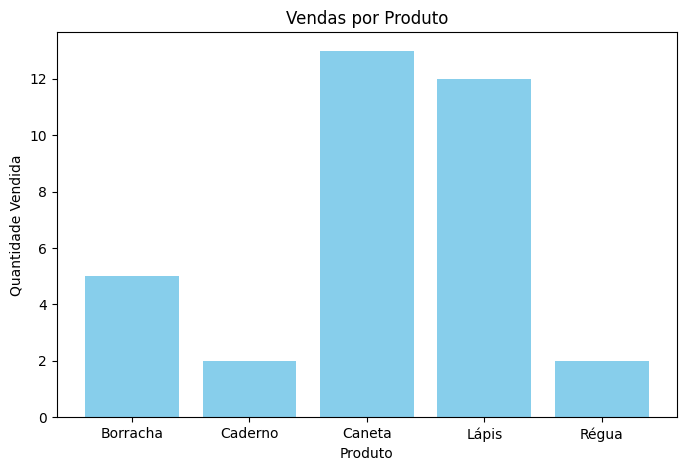

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexão com o banco de dados
conn = sqlite3.connect('projeto.db')
cursor = conn.cursor()
cursor.execute("PRAGMA foreign_keys = ON;")  # Garante integridade referencial

# Criação das tabelas
try:
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS pessoas (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nome TEXT NOT NULL,
        idade INTEGER
    );
    ''')
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS produtos (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        descricao TEXT NOT NULL,
        estoque INTEGER,
        preco REAL
    );
    ''')
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS vendas (
        id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
        id_pessoa INTEGER,
        id_produto INTEGER,
        quantidade INTEGER,
        FOREIGN KEY (id_pessoa) REFERENCES pessoas(id),
        FOREIGN KEY (id_produto) REFERENCES produtos(id)
    );
    ''')
    conn.commit()
except sqlite3.Error as e:
    print(f"Erro na criação das tabelas: {e}")

# Inserção de dados
try:
    # 🔸 Remover após a primeira execução
#    cursor.execute('SELECT COUNT(*) FROM pessoas')
#    if cursor.fetchone()[0] == 0:
#        cursor.executemany('INSERT INTO pessoas (nome, idade) VALUES (?, ?)', [
#            ('Maria', 30),
#            ('João', 25),
#            ('Ana', 40),
#            ('Carlos', 22),
#            ('Beatriz', 35)
#        ])

    # 🔸 Remover após a primeira execução
#    cursor.execute('SELECT COUNT(*) FROM produtos')
#    if cursor.fetchone()[0] == 0:
#        cursor.executemany('INSERT INTO produtos (descricao, estoque, preco) VALUES (?, ?, ?)', [
#            ('Caneta', 100, 1.50),
#            ('Caderno', 50, 6.50),
#            ('Borracha', 70, 0.99),
#            ('Lápis', 120, 0.80),
#            ('Régua', 30, 2.00)
#        ])

    # 🔸 Remover após a primeira execução
#    cursor.execute('SELECT COUNT(*) FROM vendas')
#    if cursor.fetchone()[0] == 0:
#        cursor.executemany('INSERT INTO vendas (id_pessoa, id_produto, quantidade) VALUES (?, ?, ?)', [
#            (1, 1, 10),  # Maria comprou 10 canetas
#            (2, 2, 2),   # João comprou 2 cadernos
#            (3, 3, 5),   # Ana comprou 5 borrachas
#            (4, 4, 12),  # Carlos comprou 12 lápis
#            (5, 1, 3),   # Beatriz comprou 3 canetas
#            (1, 5, 2)    # Maria comprou 2 réguas
#       ])
    conn.commit()
except sqlite3.Error as e:
    print(f"Erro ao inserir dados: {e}")

# Consulta e exibição
try:
    cursor.execute('''
    SELECT v.id_venda, p.nome, pr.descricao, v.quantidade
    FROM vendas v
    JOIN pessoas p ON v.id_pessoa = p.id
    JOIN produtos pr ON v.id_produto = pr.id;
    ''')
    resultados = cursor.fetchall()
    df = pd.DataFrame(resultados, columns=['ID Venda', 'Cliente', 'Produto', 'Quantidade'])
    display(df)
except sqlite3.Error as e:
    print(f"Erro na consulta: {e}")

# Relatório de vendas por produto
try:
    cursor.execute('''
    SELECT pr.descricao, SUM(v.quantidade) as total_vendas
    FROM vendas v
    JOIN produtos pr ON v.id_produto = pr.id
    GROUP BY pr.descricao;
    ''')
    resultados_vendas = cursor.fetchall()
    df_vendas = pd.DataFrame(resultados_vendas, columns=['Produto', 'Total Vendas'])
    print("Relatório: Total de vendas por produto")
    display(df_vendas)
except sqlite3.Error as e:
    print(f"Erro no relatório de vendas: {e}")

# Média de idade
try:
    cursor.execute('SELECT AVG(idade) FROM pessoas;')
    media_idade = cursor.fetchone()[0]
    print(f"Média de idade das pessoas cadastradas: {media_idade:.2f} anos")
except sqlite3.Error as e:
    print(f"Erro ao calcular média de idade: {e}")

# Gráfico
try:
    produtos = df_vendas['Produto']
    vendas = df_vendas['Total Vendas']
    plt.figure(figsize=(8, 5))
    plt.bar(produtos, vendas, color='skyblue')
    plt.title('Vendas por Produto')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.show()
except Exception as e:
    print(f"Erro ao gerar gráfico: {e}")

# Encerramento do banco
conn.close()  # Descomente se desejar encerrar após rodar tudo